In [1]:
import numpy as np
import pandas as pd
import json
import ndjson
import os
import pdb
import matplotlib.pyplot as plt
import tkinter

In [2]:
os.getcwd()

'C:\\Users\\PCCR\\SB\\Capstone'

In [3]:
# set column width because of the max characters of 140 allowed in a tweet
pd.options.display.max_colwidth=200

In [4]:
# read the entire file into a python array
with open('realdonaldtrump.ndjson', encoding='utf8') as f:
    data = ndjson.load(f)


In [5]:
#place file into a dataframe for further exploratoritive use
df = pd.DataFrame(data)

In [6]:
len(df)

40241

In [22]:
max(df.retweet_count)

321390

In [42]:
print(df.iloc[34757]['retweeted_status']['entities']['urls'][0])

{'display_url': 'twitter.com/i/web/status/9…', 'expanded_url': 'https://twitter.com/i/web/status/986436485539770368', 'indices': [117, 140], 'url': 'https://t.co/pysLkufr7L'}


In [7]:
# creating bool series True for NaN values  
bool_series = pd.isnull(df['retweet_count'])  
    
# filtering data
df[bool_series]  

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,retweeted,retweeted_status,scopes,source,text,truncated,user,withheld_copyright,withheld_in_countries,withheld_scope


In [8]:
print(np.sum([df['lang'] != 'en']))

671


In [9]:
list_for_drop = []
for i in range(len(df)):
    if (df.lang[i] != 'en'):
        list_for_drop.append(i)

In [10]:
print(len(list_for_drop))

671


In [11]:
df_new = df.drop(list_for_drop)

In [12]:
len(df_new)

39570

In [23]:
df_new.created_at[627]

'Thu Oct 06 13:49:25 +0000 2011'

In [24]:
plot_d = df_new['created_at']

In [57]:
from datetime import datetime
import time

x = [datetime.strptime(elem, '%a %b %d %H:%M:%S +0000 %Y').date() for elem in plot_d]
y = df_new.retweet_count

In [58]:
print(x)

[datetime.date(2009, 5, 4), datetime.date(2009, 5, 5), datetime.date(2009, 5, 8), datetime.date(2009, 5, 8), datetime.date(2009, 5, 12), datetime.date(2009, 5, 12), datetime.date(2009, 5, 13), datetime.date(2009, 5, 14), datetime.date(2009, 5, 15), datetime.date(2009, 5, 16), datetime.date(2009, 5, 17), datetime.date(2009, 5, 18), datetime.date(2009, 5, 19), datetime.date(2009, 5, 20), datetime.date(2009, 5, 20), datetime.date(2009, 5, 22), datetime.date(2009, 5, 22), datetime.date(2009, 5, 23), datetime.date(2009, 5, 26), datetime.date(2009, 5, 27), datetime.date(2009, 5, 28), datetime.date(2009, 6, 3), datetime.date(2009, 6, 5), datetime.date(2009, 6, 8), datetime.date(2009, 6, 14), datetime.date(2009, 6, 15), datetime.date(2009, 6, 18), datetime.date(2009, 6, 21), datetime.date(2009, 6, 23), datetime.date(2009, 6, 24), datetime.date(2009, 6, 26), datetime.date(2009, 6, 30), datetime.date(2009, 7, 4), datetime.date(2009, 7, 13), datetime.date(2009, 7, 15), datetime.date(2009, 7, 22),

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'

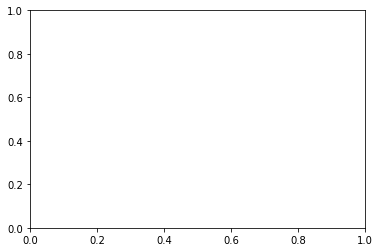

In [27]:


#elem = ['Thu Oct 06 13:49:25 +0000 2011', 'Thu Oct 07 13:49:25 +0000 2011'
#x = [datetime.datetime.strptime(elem, '%a %b %d %H:%M:%S %Y') for elem in plot_d]
#x = [datetime.strptime(elem,'%a %b %d %H:%M:%S +0000 %Y') ]
#df_new['month_year'] = df_new.created_at.date
#y = range(max(df_new.retweet_count))

plt.plot(x, y)
plt.show()    

In [ ]:


import datetime as dt

dates = ['01/02/1991','01/03/1991','01/04/1991']
x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in dates]
y = range(len(x))


# Clean the data by:

1. Removing all irrelevant characters such as any non alphanumeric characters
2. Tokenize the text by separating it into individual words
3. Remove words that are not relevant, such as “@” twitter mentions or urls
4. Convert all characters to lowercase, in order to treat words such as “hello”, “Hello”, and “HELLO” the same
5. Considering combining misspelled or alternately spelled words to a single representation (e.g. “cool”/”kewl”/”cooool”)
6. Considering lemmatization (reduce words such as “am”, “are”, and “is” to a common form such as “be”)

In [52]:
df_clean = pd.DataFrame(df_new, columns = ('retweet_count', 'text'))

In [57]:
df_clean.retweet_count

0          501
1           33
2           13
3           12
4         1422
5           29
6           15
7           15
8           14
9           21
10          29
11          67
12          17
13          26
14          10
15          28
16          13
17          54
18          27
19           4
20          57
21          14
22          13
23          11
24          17
25          36
26          20
27          69
28          15
29          26
         ...  
40211    19254
40212    16651
40213    17246
40214    11651
40215     9445
40216    20162
40217    13278
40218    21255
40219    22745
40220    10608
40221    13420
40222    14332
40223    11570
40224     7667
40225     9529
40226     8219
40227     9527
40228     7598
40229    20914
40230     7971
40231     7307
40232     8154
40233     7363
40234     7239
40235    13489
40236     6331
40237     7694
40238     2540
40239     4533
40240     5236
Name: retweet_count, Length: 39570, dtype: int64

In [58]:
text_of_tweets = df_clean['text']


In [57]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text(txt):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    txt = txt.lower()
    txt = re.sub('\[.*?@\#]', ' ', txt)
    txt = re.sub('[%s]' % re.escape(string.punctuation), '', txt)
    txt = re.sub('\w*\d\w*', ' ', txt)
    txt = re.sub('\n', ' ', txt)
    return txt

round1 = lambda x: clean_text(x)

In [58]:
# The updated text
data_clean_first = pd.DataFrame(text_of_tweets.apply(round1))
data_clean_first.text[34757]
#data_clean_first.head()



'rt abeshinzo フロリダに到着し、早速トランプ大統領との首脳会談に臨みました。今日は、大半を北朝鮮問題に費やし、非常に重要な点で認識を一致させることができました。 「日本のために最善となるようベストを尽くす」 トランプ大統領は、来る米朝首脳会談で拉致問題を取り上げ…'

In [49]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('\n', ' ', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [50]:
# The updated text
data_clean_second = pd.DataFrame(data_clean_first.text.apply(round2))
data_clean_second.text[40030:40035]
#data_clean_second.head()

40030        i am in south korea now president moon and i have  toasted  our new trade deal a far better one for us than that   
40031        the highly respected farm journal has just announced my approval rating with our great farmers at   and that des   
40032         the leaders of virtually every country that i met at the   congratulated me on our great economy many countries   
40033    rt thebluehousekr realdonaldtrump   hellopolicy mofakr secpompeo 오울렛 초소에서 브리핑을 받고 북측을 바라보며 대화하는 한미 정상의 모습 오울렛 초소는 한국전쟁 
40034       leaving south korea after a wonderful meeting with chairman kim jong un stood on the soil of north korea an impor   
Name: text, dtype: object

In [51]:
# Apply a third round of cleaning
def clean_text_round3(text):
    '''Get rid of the http sites.'''
    text = re.sub('http\\w*', ' ', text)
    
    return text

round3 = lambda x: clean_text_round3(x)

In [52]:
# The updated text
data_clean_third = pd.DataFrame(data_clean_second.text.apply(round3))
data_clean_third.text[34757]

'rt abeshinzo フロリダに到着し、早速トランプ大統領との首脳会談に臨みました。今日は、大半を北朝鮮問題に費やし、非常に重要な点で認識を一致させることができました。 「日本のために最善となるようベストを尽くす」 トランプ大統領は、来る米朝首脳会談で拉致問題を取り上げ '

In [53]:
# Create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
import pickle

cv = CountVectorizer(stop_words='english')
data_dtm = pd.DataFrame(cv.fit_transform(data_clean_third.text).toarray(), columns=cv.get_feature_names())

In [54]:
list_for_drop = cv.get_feature_names()[-72:-1]


In [55]:
data_clean_third.text[34757]

'rt abeshinzo フロリダに到着し、早速トランプ大統領との首脳会談に臨みました。今日は、大半を北朝鮮問題に費やし、非常に重要な点で認識を一致させることができました。 「日本のために最善となるようベストを尽くす」 トランプ大統領は、来る米朝首脳会談で拉致問題を取り上げ '

In [28]:
number_for_drop = []
for i in range(len(data_clean_third.text)-1):
    for sign in list_for_drop:
        if re.search(sign, data_clean_third.text[i]):
            print(i, '', sign)
            number_for_drop.append(i)
            


33681  ありがとうございます
33697  そして
33697  アジア歴訪の大成功をお祈りしています
33697  トランプ大統領
33697  トランプ大統領による
33697  ドナルド
33697  初の
33697  日米同盟の揺るぎない絆を世界に示すことができました
33697  本当にありがとう
33697  歴史的な日本訪問は
33697  間違いなく
34757  トランプ大統領
34757  トランプ大統領は
34757  フロリダに到着し
34757  今日は
34757  大半を北朝鮮問題に費やし
34757  日本のために最善となるようベストを尽くす
34757  早速トランプ大統領との首脳会談に臨みました
34757  来る米朝首脳会談で拉致問題を取り上げ
34757  非常に重要な点で認識を一致させることができました
37239  この機会を活かし
37239  という共通の目標に向かって
37239  トランプ大統領
37239  モディ首相と
37239  初めてとなる日米印三か国による首脳会談を行いました
37239  緊密に連携していくことで一致しました
37239  自由で開かれたインド太平洋
37956  رژیم
37956  سال
37956  سرکوب
37956  شده
37956  فساد
37956  فقط
37956  مدتهاست
37956  مردم
37956  موجب
37956  چهلسالشکست
37956  که
38903  そして
38903  そして本日のゴルフと
38903  北朝鮮問題への対応
38903  昨日の首脳会談
38903  更には世界情勢に至るまで
38903  本日
38903  様々な課題についてじっくりと話をすることができました
38903  経済
39505  トランプ大統領
39505  日本へようこそ
39507  トランプ大統領
39507  令和初の国賓としてお迎えしたトランプ大統領と千葉でゴルフです
39507  初の
39507  新しい令和の時代も日米同盟をさらに揺るぎないものとしていきたいと考えています
39515  トランプ大統領
39515  トランプ大統領は
39515  トランプ大統領は安倍首相と共に皇居での歓迎式典

In [21]:
len(number_for_drop)

83